### Exercise

In [1]:
import os
import subprocess
import matplotlib.pyplot as plt


### Download the E.coli genome (if needed)

In [2]:
working_dir = os.getcwd()
if not os.path.exists(f'{working_dir}/e_coli_genome.fa'):
	subprocess.run(f'wget -qO- https://ftp.ensemblgenomes.ebi.ac.uk/pub/bacteria/release-62/fasta/bacteria_26_collection/escherichia_coli_w_gca_000184185/dna/Escherichia_coli_w_gca_000184185.ASM18418v1_.dna.toplevel.fa.gz | gunzip > e_coli_genome.fa', shell = True)

path_to_genome = f'{working_dir}/e_coli_genome.fa'

Define a function that takes as input a fasta file and a k value and treturns a list of nonmers

In [3]:
def nonmers(genomefile, k):
    #Example run
    # list_of_nonmers = nonmers(path_to_fasta_file, k = 5)
    
    import regex as re
    import itertools

    # Importing sequence
    file = open(genomefile, 'r')
    seq = "" #An empty string
    count = 0
    k =int(k)
    for line in file:
        count +=1
        if (count > 1) : #the first line of a fasta does not contain any part of the sequence
            length=len(line)
            seq=seq+line[0:length-1] #length-1 because the last character is the \n character
            
    file.close()

    seq = re.sub("[^AGCT]", "", seq) #Remove any non AGCT nucleotide from the sequence

    # Creating the kmer combination table
    nucleotides = ['A', 'C', 'G', 'T']
    allkmers = [''.join(p) for p in itertools.product(nucleotides, repeat=k)] #Create a list of all possible kmers

    kmer_genome_list = []
    for i in range(len(seq) - k + 1): #slide the whole genome with a step of 1 and append each kmer to the kmer_genome_list
        kmer_genome_list.append(seq[i:i+k]) 

    kmer_genome_set = set(kmer_genome_list) #Keep only the uniq kmers.
    return list(set(allkmers) - kmer_genome_set)

Use the the built function to find the nonmers in the loaded genome

In [5]:
e_coli_nonmers = nonmers(path_to_genome, 1)

In [6]:
e_coli_nonmers

[]

Plot the number of nonmers with respect to k

In [7]:
nonmer_list = []
for i in range(1,11):
    print(i)
    nonmer_list.append(len(nonmers(path_to_genome, i)))

1
2
3
4
5
6
7
8
9
10


In [11]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

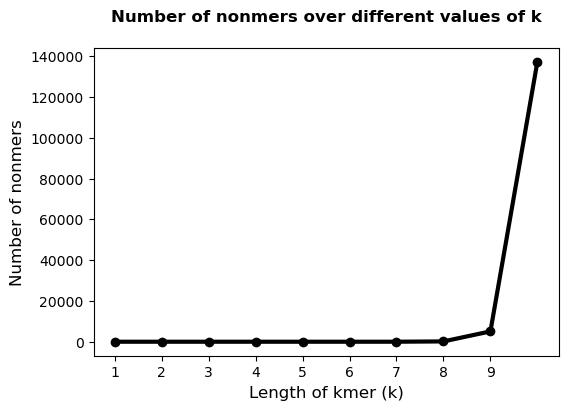

In [33]:
fig, ax = plt.subplots(figsize = (6,4))
ax.plot(nonmer_list, c = 'black', linewidth = 3, marker = 'o')

ax.set_xticks(list(range(0,9)))
ax.set_xticklabels(list(range(1,10)))
ax.set_ylabel('Number of nonmers', fontsize = 12)
ax.set_xlabel('Length of kmer (k)', fontsize = 12)
ax.set_title('Number of nonmers over different values of k', fontsize = 12, pad = 19, fontweight='bold')
plt.savefig(f'{working_dir}/figures/nonmers_over_k', dpi=300, bbox_inches='tight')
plt.show()
